# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import cm

2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [2]:
sna = pd.read_csv('Social_Network_Ads.csv')
sna = sna.filter(['Age', 'EstimatedSalary', 'Purchased'])
sna

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


3. Separa los datos de entrenamiento de los datos de prueba.

In [67]:
from sklearn.model_selection import train_test_split

X = sna.iloc[:,[0,1]].values
y = sna.iloc[:,2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Estandariza los datos (`StandardScaler`).

In [68]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [69]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0, probability=True)

svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

6. Realiza las predicciones sobre los datos de prueba.

In [70]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [76]:
from sklearn.metrics import confusion_matrix

def plot_confmatrix(y, y_pred, title):
    confusion_matrix_t = confusion_matrix(y, y_pred)

    sns.heatmap(confusion_matrix_t, annot=True, fmt='g')
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

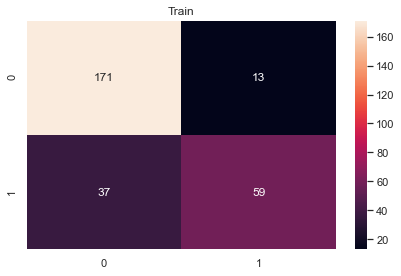

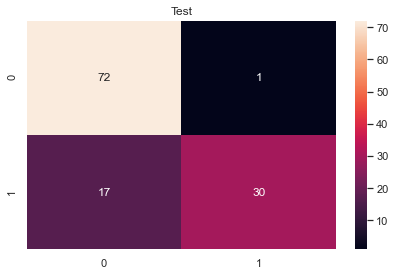

In [74]:
plot_confmatrix(y_train, y_train_pred, 'Train')
plot_confmatrix(y_test, y_test_pred, 'Test')

In [81]:
from sklearn.metrics import classification_report

def show_classification_report(y, y_pred, title):
    classification_report_t = classification_report(y, y_pred)

    print(title)
    print(classification_report_t)
    print('\n')

In [80]:
show_classification_report(y_train, y_train_pred, 'Train')
show_classification_report(y_test, y_test_pred, 'Test')

Train
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       184
           1       0.82      0.61      0.70        96

    accuracy                           0.82       280
   macro avg       0.82      0.77      0.79       280
weighted avg       0.82      0.82      0.81       280



Test
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120





In [27]:
svc = SVC(gamma='auto', probability=True)
#svc = SVC(gamma='auto', probability=True, C=1.0, kernel='rbf')
#svc = SVC(gamma='auto', probability=True, C=1.0, kernel='poly')
#svc = SVC(gamma='auto', probability=True, C=1.0, kernel='sigmoid')
#svc = SVC(gamma='scale', probability=True, C=0.5, kernel='rbf')
#svc = SVC(gamma='scale', probability=True, C=1.0, kernel='poly')
#svc = SVC(gamma='scale', probability=True, C=1.0, kernel='sigmoid')

svc.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [116]:
def graficar_limites_2x(X, y, svc, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0], X[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                          np.linspace(*ylim, num=200))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap =cm.coolwarm)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.tight_layout()
    plt.title(title)
    #plt.savefig('RL_2D_2.png', dpi = 300)
    plt.show()

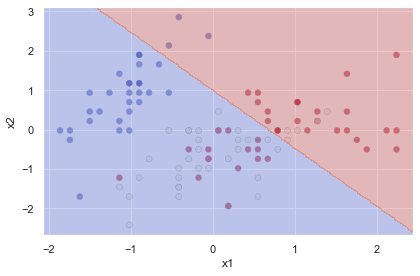

In [91]:
graficar_limites_2x(X_train, y_train, svc, 'Train')

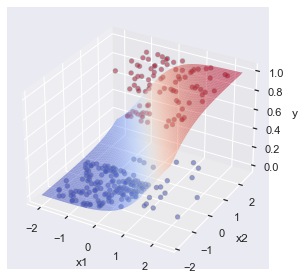

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c = y_train, alpha = 0.5, lw = 1, edgecolors= 'grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = (svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]).reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=True, alpha = 0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
# plt.savefig('RL_2D_3.png', dpi = 300)

plt.show()

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.
2. ¿Cuál es la función del parámetro `Gamma`?
3. Repite el ejercicio 1, modificando los valores de `Gamma`
4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 


## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [102]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns= np.append(iris['feature_names'], ['target']))

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [110]:
X = df.iloc[:, :2].values
y = df.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)


--rbf--


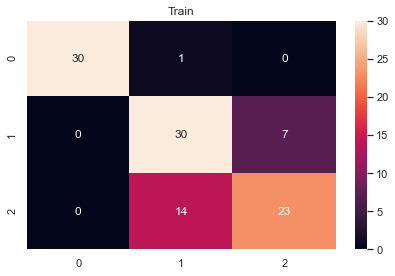

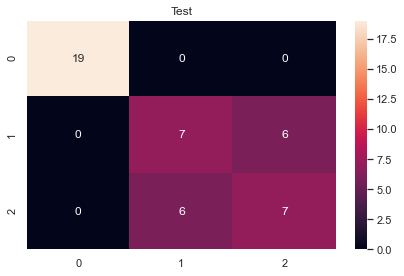

Train
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        31
         1.0       0.67      0.81      0.73        37
         2.0       0.77      0.62      0.69        37

    accuracy                           0.79       105
   macro avg       0.81      0.80      0.80       105
weighted avg       0.80      0.79      0.79       105



Test
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.54      0.54      0.54        13
         2.0       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45





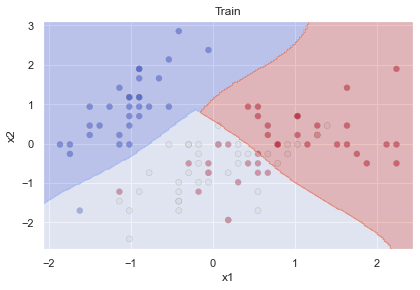

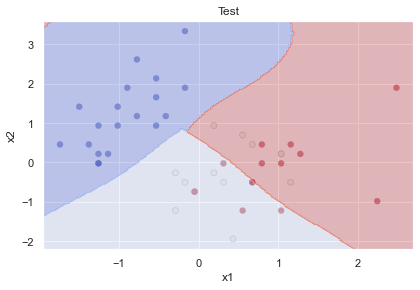


--poly--


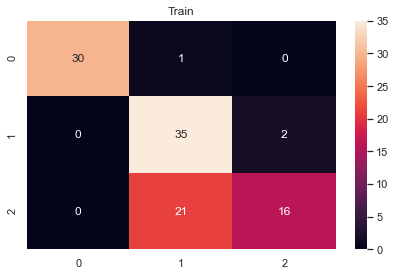

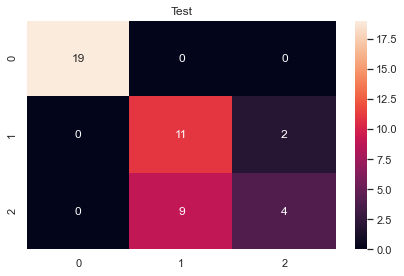

Train
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        31
         1.0       0.61      0.95      0.74        37
         2.0       0.89      0.43      0.58        37

    accuracy                           0.77       105
   macro avg       0.83      0.78      0.77       105
weighted avg       0.82      0.77      0.76       105



Test
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.55      0.85      0.67        13
         2.0       0.67      0.31      0.42        13

    accuracy                           0.76        45
   macro avg       0.74      0.72      0.70        45
weighted avg       0.77      0.76      0.74        45





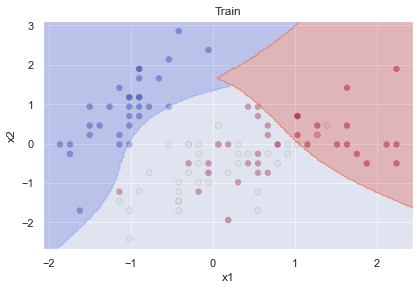

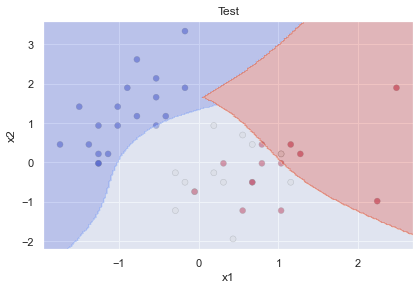


--sigmoid--


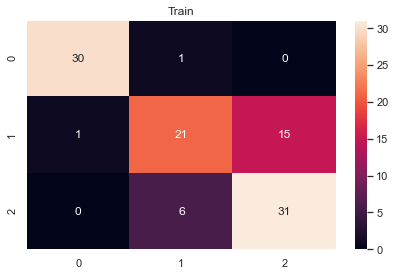

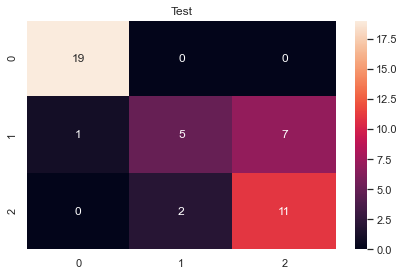

Train
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        31
         1.0       0.75      0.57      0.65        37
         2.0       0.67      0.84      0.75        37

    accuracy                           0.78       105
   macro avg       0.80      0.79      0.79       105
weighted avg       0.79      0.78      0.78       105



Test
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.71      0.38      0.50        13
         2.0       0.61      0.85      0.71        13

    accuracy                           0.78        45
   macro avg       0.76      0.74      0.73        45
weighted avg       0.78      0.78      0.76        45





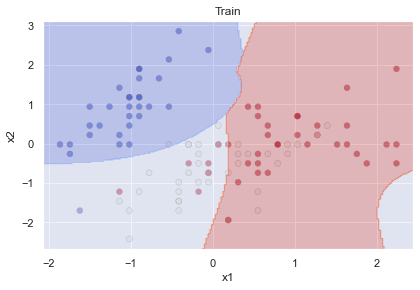

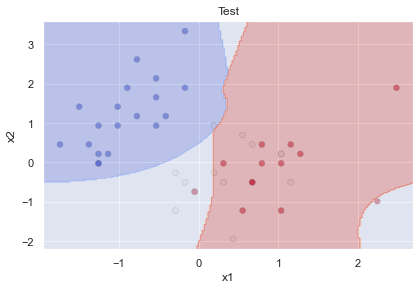

In [117]:
for kernel in ['rbf', 'poly' ,'sigmoid']:
    print('\n' + f'--{kernel}--')
    svc = SVC(kernel=kernel, random_state=0)
    svc.fit(X_train, y_train)
    
    #---
    
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    
    #---
    
    plot_confmatrix(y_train, y_train_pred, 'Train')
    plot_confmatrix(y_test, y_test_pred, 'Test')
    
    #---
    
    show_classification_report(y_train, y_train_pred, 'Train')
    show_classification_report(y_test, y_test_pred, 'Test')
    
    #---
    
    graficar_limites_2x(X_train, y_train, svc, 'Train')
    graficar_limites_2x(X_test, y_test, svc, 'Test')